In [1]:
using Images, ImageFeatures, FileIO, ImageView, ImageDraw, Colors
# using ImageProjectiveGeometry

img1 = load("../test/imgs/1.jpg");
img2 = load("../test/imgs/2.jpg");
img1p = parent(img1);
img2p = parent(img2);

In [45]:
function get_descriptors(img::AbstractArray)
    imgp = parent(img)
    brisk_params = ImageFeatures.BRISK()
    features = ImageFeatures.Features(Keypoints(imcorner(imgp, method=ImageFeatures.harris)))
    desc, ret_features = ImageFeatures.create_descriptor(Gray.(imgp), features, brisk_params)
end

get_descriptors (generic function with 1 method)

In [41]:
# descriptors
desc_1, ret_features_1 = get_descriptors(img1p);
desc_2, ret_features_2 = get_descriptors(img2p);

In [47]:
# matches
threshold = 0.1;
matches = ImageFeatures.match_keypoints(Keypoints(ret_features_1), Keypoints(ret_features_2), desc_1, desc_2, threshold);

Array{Array{CartesianIndex{2},1},1}

In [52]:
typeof(matches)
# axes(img1p)

(Base.OneTo(720), Base.OneTo(1280))

In [51]:
H = ImageProjectiveGeometry.homography2d(img1p, img2p)

MethodError: MethodError: no method matching homography2d(::Array{RGB{Normed{UInt8,8}},2}, ::Array{RGB{Normed{UInt8,8}},2})

In [49]:
H = ImageProjectiveGeometry.homography2d(matches)

MethodError: MethodError: no method matching homography2d(::Array{Array{CartesianIndex{2},1},1})
Closest candidates are:
  homography2d(!Matched::Array{T<:Real,2}) where T<:Real at C:\Users\m1\.julia\packages\ImageProjectiveGeometry\LXkqM\src\projective.jl:981
  homography2d(!Matched::Array{T1<:Real,2}, !Matched::Array{T2<:Real,2}) where {T1<:Real, T2<:Real} at C:\Users\m1\.julia\packages\ImageProjectiveGeometry\LXkqM\src\projective.jl:937

In [1]:
using Images, ImageFeatures, FileIO, ImageView
using CoordinateTransformations, StaticArrays, ImageTransformations, LinearAlgebra, Rotations;

img1 = load("../test/all_3/1.jpg");
img2 = load("../test/all_3/2.jpg");
# img3 = load("../test/all_3/3.jpg");

In [ ]:
2×2 RotMatrix{2,Float64,4}:
  0.999507   0.0314108
 -0.0314108  0.999507 

3×3 RotMatrix{3,Float64,9}:
  0.999788   0.003629  -0.020254
 23.2449    -0.003697   0.999988
 -0.003359  -0.077094   0.020242

LinearMap([0.999507 0.0314108; -0.0314108 0.999507])
LinearMap([0.999788 0.003629; -0.003359 0.999788])
LinearMap([0.999788 0.003629 -0.020254; 23.2449 -0.003697 0.999988; -0.003359 -0.077094 0.020242])

In [ ]:
# rot_1 = [0.999788  0.003629  -0.020254;  23.244938  -0.003697  0.999988 ; -0.003359  -0.077094  0.020242]
rot_1 = [0.999788  0.020254 ; -0.020254 0.999788]
tran = [0.003433  0.999789  0.316536]
rot = RotMatrix{2, Float64}(rot_1)

In [3]:
using CoordinateTransformations, Rotations, StaticArrays

# rot_1 = RotMatrix{3, Float64}(rot_1)
# ϕv = AngleAxis(rot_1')  # 2.9687, -0.0462937, -0.000726159, 0.998928   
# spq = SPQuat(rot_1)  # -0.0424553, -0.000665949, 0.916101
# a = Quat(rot_1)  # 0.0863398, -0.0461209, -0.000723447, 0.995197
# rv = RodriguesVec(rot_1)  # -0.137432, -0.00215575, 2.96551   **********  向量和矩阵 转换. 
# 对应到 rvecs_matrix = cv2.Rodrigues(rvecs, None)   
# ϕ = rotation_angle(rot_1)  # 
# v = rotation_axis(rot_1)  # 

rot_1 = [0.999788   0.003629  -0.020254; 
         -0.003697  0.999988  -0.003359;  
         0.020242   0.003433  0.999789 ]

rvecs = RodriguesVec(rot_1)  # 0.00339625, -0.0202495, -0.00366327
# rvecs.sx
# r_xyz = RotXYZ(rot_1)  # 3.08846, -0.205127, -1.60784

3×3 RodriguesVec{Float64}(0.00339625, -0.0202495, -0.00366327):
  0.999788    0.00362862  -0.0202542 
 -0.00369738  0.999988    -0.00335891
  0.0202418   0.00343309   0.999789  

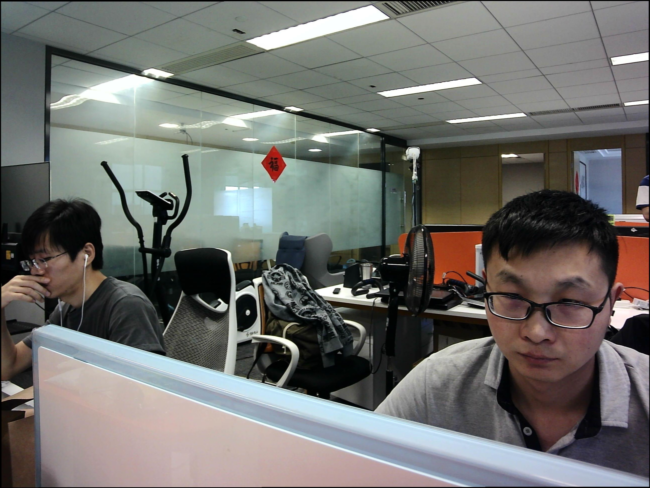

In [18]:
# 0.999913  0.001119  0.013171  24.151129 ;
# -0.001307  0.999897  0.014312  0.111203;
# -0.013154  -0.014328  0.999811  -0.040267;
# 0.000000  0.000000  0.000000  1.000000  

rot_2 = [0.999913  0.001119;
         -0.001307  0.999897]
tran = [0.003433  0.999789  0.316536]
rot_2 = RotMatrix{2, Float64}(rot_2)

H_2 = LinearMap(rot_2)
# T_2 = Translation(tran)
img2_1 = ImageTransformations.warp(img2, H_2)
# img2_1 = ImageTransformations.warp(img2, T_2);
# img2_2 = T_2(img2)
# img2 = img2_1[1:end-500, 1:2592]
img2_1

In [29]:
using CoordinateTransformations, Rotations, StaticArrays
using ImageTransformations

#=
0.999788  0.003629  -0.020254  23.244938;  
-0.00369  0.999988  -0.003359  -0.077094;
0.020242  0.003433  0.999789  0.316536;  
0.000000  0.000000  0.000000  1.000000 
=#

rot_1 = [0.999788   0.003629  -0.020254;
         -0.003697  0.999988  -0.003359;
         0.020242   0.003433  0.999789]
tran_1 = [23.244938;  -0.077094;  0.316536]

rot_1 = RotMatrix{3}(rot_1)
# H_1 = LinearMap(rot_1)  # 3*3 
H_1 = AffineMap(rot_1, tran_1)
# T_1 = Translation(tran_1)

# img3 = reshape(img1, size(img1)..., 1)
img1_1 = ImageTransformations.warp(img1, H_1)
# img1_1 = ImageTransformations.autorange(img1, H_1)


DimensionMismatch: DimensionMismatch("Tried to multiply arrays of size (3, 3) and (2,)")

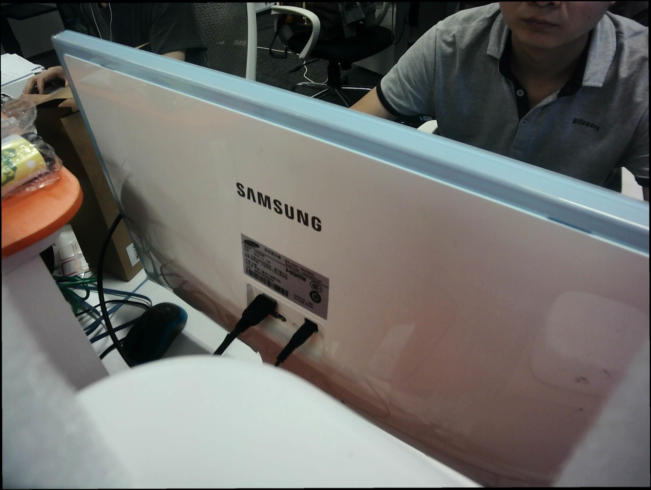

In [10]:
img1 = load("../test/all_3/1.jpg");
rot_1 = [0.999788   0.003629;
         -0.003697  0.999988]
rot_1 = RotMatrix{2}(rot_1)
# print(size(rot_1))
H_1 = LinearMap(rot_1)
img1_1 = ImageTransformations.warp(img1, H_1)
